In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import wilcoxon
from __future__ import division
import pandas as pd
import random
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

In [45]:
# CSI1
person = [0.73, 0.71, 0.79, 0.77, 0.65, 0.82, 0.77, 0.79]
person_rand = [0.51, 0.48, 0.45, 0.49, 0.46, 0.5 , 0.54, 0.48]
face = [0.83, 0.83, 0.85, 0.77, 0.72, 0.84, 0.77, 0.78]
face_rand = [0.56, 0.48, 0.48, 0.57, 0.51, 0.48, 0.47, 0.45]
animal = [0.73, 0.69, 0.83, 0.8,  0.71, 0.76, 0.78, 0.81]
animal_rand = [0.5,  0.49, 0.56, 0.52, 0.53, 0.58, 0.47, 0.5 ]
vehicle = [0.63, 0.67, 0.72, 0.64, 0.66, 0.63, 0.64, 0.72]
vehicle_rand = [0.48, 0.54, 0.46, 0.52, 0.52, 0.47, 0.48, 0.55]
outdoor = [0.57, 0.6,  0.55, 0.54, 0.5,  0.58, 0.53, 0.57]
outdoor_rand = [0.52, 0.52, 0.42, 0.4,  0.42, 0.45, 0.51, 0.46]
sports = [0.72, 0.71, 0.8,  0.68, 0.71, 0.73, 0.77, 0.69]
sports_rand = [0.48, 0.42, 0.52, 0.53, 0.52, 0.55, 0.42, 0.53]
food = [0.76, 0.56, 0.76, 0.69, 0.77, 0.71, 0.53, 0.65]
food_rand = [0.5,  0.56, 0.47, 0.52, 0.48, 0.45, 0.41, 0.46]
furniture = [0.59, 0.58, 0.68, 0.6,  0.63, 0.65, 0.65, 0.64]
furniture_rand = [0.47, 0.47, 0.48, 0.49, 0.54, 0.52, 0.52, 0.48]
tool = [0.61, 0.6,  0.63, 0.58, 0.55, 0.57, 0.56, 0.57]
tool_rand = [0.52, 0.51, 0.51, 0.49, 0.47, 0.53, 0.48, 0.53]

In [46]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [47]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [48]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

face :
t-statistic: 13.435692500095064 p-value: 1.0824650908879953e-09
animal :
t-statistic: 11.142326113052102 p-value: 1.2041826915886678e-08
person :
t-statistic: 12.187704139836546 p-value: 3.8309050251813085e-09
furniture :
t-statistic: 8.50464341992618 p-value: 3.3357844322819233e-07
vehicle :
t-statistic: 9.009750815427566 p-value: 1.6721980064283787e-07
sports :
t-statistic: 10.008280595255748 p-value: 4.623050338034713e-08
food :
t-statistic: 5.4193552905032805 p-value: 4.5202867491006396e-05
outdoor :
t-statistic: 4.5106620563767015 p-value: 0.0002445557554958446
tool :
t-statistic: 6.286543238461573 p-value: 1.0000102779983908e-05
Bonferroni:

Reject: [ True  True  True  True  True  True  True  True  True]
pvals corrected: [9.74218582e-09 1.08376442e-07 3.44781452e-08 3.00220599e-06
 1.50497821e-06 4.16074530e-07 4.06825807e-04 2.20100180e-03
 9.00009250e-05]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True  True]
pvals corrected: [9.74218582e-09

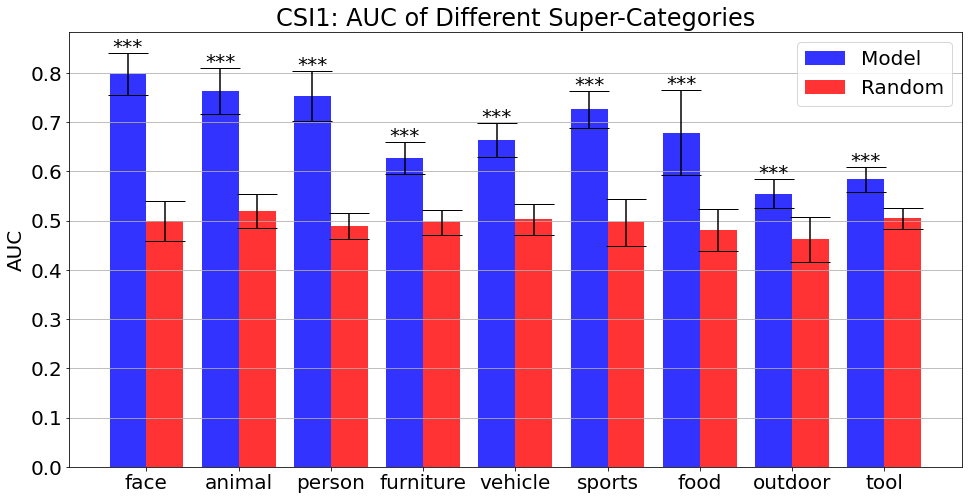

In [49]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories1 = categories
categories1_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI1: AUC of Different Super-Categories', leg_loc='upper right')

In [50]:
# CSI2
person = [0.64, 0.66, 0.71, 0.73, 0.75, 0.63, 0.68, 0.61]
person_rand = [0.47, 0.5,  0.51, 0.49, 0.46, 0.54, 0.48, 0.51]
face = [0.79, 0.76, 0.76, 0.76, 0.69, 0.7,  0.75, 0.78]
face_rand = [0.48, 0.5,  0.53, 0.48, 0.54, 0.56, 0.45, 0.53]
animal = [0.63, 0.61, 0.64, 0.6,  0.64, 0.58, 0.67, 0.66]
animal_rand = [0.54, 0.53, 0.51, 0.54, 0.58, 0.5,  0.52, 0.54]
vehicle = [0.57, 0.64, 0.55, 0.6,  0.63, 0.64, 0.59, 0.52]
vehicle_rand = [0.45, 0.54, 0.48, 0.54, 0.5,  0.48, 0.55, 0.52]
outdoor = [0.52, 0.55, 0.55, 0.47, 0.55, 0.54, 0.57, 0.51]
outdoor_rand = [0.52, 0.49, 0.45, 0.46, 0.5,  0.51, 0.51, 0.56]
sports = [0.58, 0.64, 0.74, 0.69, 0.62, 0.58, 0.56, 0.68]
sports_rand = [0.5,  0.47, 0.56, 0.49, 0.51, 0.47, 0.59, 0.49]
food = [0.63, 0.63, 0.64, 0.56, 0.55, 0.61, 0.59, 0.49]
food_rand = [0.47, 0.45, 0.46, 0.51, 0.53, 0.54, 0.47, 0.52]
furniture = [0.58, 0.54, 0.61, 0.56, 0.49, 0.62, 0.56, 0.57]
furniture_rand = [0.58, 0.55, 0.45, 0.6,  0.48, 0.5,  0.57, 0.53]
tool = [0.57, 0.52, 0.51, 0.61, 0.54, 0.49, 0.52, 0.48]
tool_rand = [0.52, 0.54, 0.46, 0.46, 0.55, 0.52, 0.47, 0.54]

face :
t-statistic: 13.1777372520775 p-value: 1.3937364787177282e-09
animal :
t-statistic: 6.983529388941122 p-value: 3.2065343625127874e-06
person :
t-statistic: 9.105794471530011 p-value: 1.471084336740996e-07
furniture :
t-statistic: 1.4405671920782546 p-value: 0.08584796723647385
vehicle :
t-statistic: 4.240545038343804 p-value: 0.00041155202960773074
sports :
t-statistic: 4.666590423286901 p-value: 0.0001817341384079075
food :
t-statistic: 4.258732595085542 p-value: 0.00039728769465962737
outdoor :
t-statistic: 1.9630130400585042 p-value: 0.034914020855309064
tool :
t-statistic: 1.1114378604524209 p-value: 0.14255155201326203
Bonferroni:

Reject: [ True  True  True False  True  True  True False False]
pvals corrected: [1.25436283e-08 2.88588093e-05 1.32397590e-06 7.72631705e-01
 3.70396827e-03 1.63560725e-03 3.57558925e-03 3.14226188e-01
 1.00000000e+00]
Benjamini/Hochberg:

Reject: [ True  True  True False  True  True  True  True False]
pvals corrected: [1.25436283e-08 9.61960309

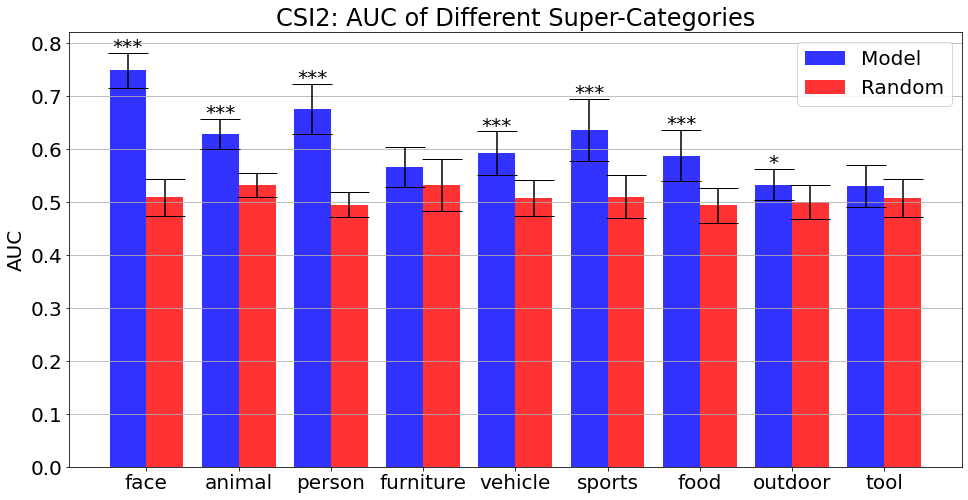

In [51]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories2 = categories
categories2_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI2: AUC of Different Super-Categories', leg_loc='upper right')

In [52]:
# CSI3
person = [0.74, 0.7,  0.79, 0.74, 0.71, 0.82, 0.65, 0.74]
person_rand = [0.48, 0.52, 0.48, 0.51, 0.54, 0.5,  0.45, 0.45]
face = [0.74, 0.84, 0.83, 0.78, 0.77, 0.81, 0.72, 0.76]
face_rand = [0.54, 0.49, 0.48, 0.44, 0.54, 0.5,  0.5,  0.5 ]
animal = [0.62, 0.65, 0.72, 0.7,  0.69, 0.74, 0.67, 0.63]
animal_rand = [0.49, 0.51, 0.49, 0.5,  0.48, 0.52, 0.52, 0.5 ]
vehicle = [0.58, 0.6,  0.59, 0.66, 0.6,  0.62, 0.6,  0.6 ]
vehicle_rand = [0.46, 0.58, 0.51, 0.49, 0.52, 0.43, 0.43, 0.5 ]
outdoor = [0.57, 0.57, 0.59, 0.56, 0.53, 0.59, 0.58, 0.64]
outdoor_rand = [0.43, 0.46, 0.47, 0.48, 0.43, 0.44, 0.46, 0.51]
sports = [0.69, 0.65, 0.76, 0.65, 0.61, 0.63, 0.67, 0.76]
sports_rand = [0.57, 0.51, 0.4,  0.44, 0.54, 0.49, 0.52, 0.39]
food = [0.57, 0.64, 0.58, 0.71, 0.62, 0.62, 0.5,  0.78]
food_rand = [0.44, 0.41, 0.57, 0.63, 0.46, 0.46, 0.5,  0.56]
furniture = [0.53, 0.57, 0.53, 0.59, 0.57, 0.59, 0.5,  0.51]
furniture_rand = [0.49, 0.59, 0.5,  0.55, 0.41, 0.55, 0.51, 0.48]
tool = [0.55, 0.59, 0.5,  0.55, 0.53, 0.48, 0.53, 0.49]
tool_rand = [0.57, 0.47, 0.52, 0.5,  0.54, 0.48, 0.55, 0.46]

face :
t-statistic: 14.957846484849691 p-value: 2.641247827781798e-10
animal :
t-statistic: 11.053664292588216 p-value: 1.332340047262983e-08
person :
t-statistic: 11.225556596432929 p-value: 1.0957652005584665e-08
furniture :
t-statistic: 1.677339312288582 p-value: 0.05782584326263932
vehicle :
t-statistic: 5.893635529877643 p-value: 1.9554783427002883e-05
sports :
t-statistic: 6.368673331236262 p-value: 8.715601621220582e-06
food :
t-statistic: 3.047545266452365 p-value: 0.004346017388597103
outdoor :
t-statistic: 8.082754504021848 p-value: 6.072981960547313e-07
tool :
t-statistic: 0.846484159964541 p-value: 0.2057593917545083
Bonferroni:

Reject: [ True  True  True False  True  True  True  True False]
pvals corrected: [2.37712305e-09 1.19910604e-07 9.86188681e-08 5.20432589e-01
 1.75993051e-04 7.84404146e-05 3.91141565e-02 5.46568376e-06
 1.00000000e+00]
Benjamini/Hochberg:

Reject: [ True  True  True False  True  True  True  True False]
pvals corrected: [2.37712305e-09 3.99702014e-

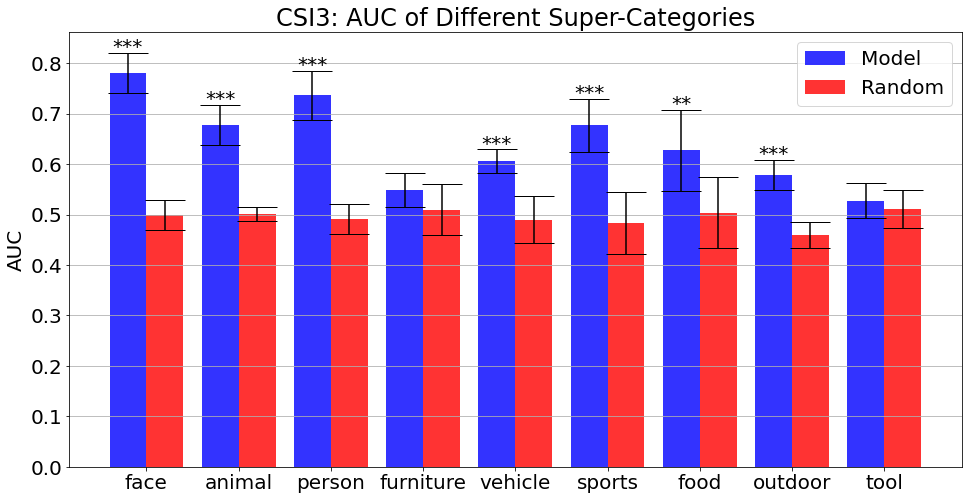

In [53]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories3 = categories
categories3_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI3: AUC of Different Super-Categories', leg_loc='upper right')

In [54]:
# CSI4
person = [0.5,  0.58, 0.54, 0.65, 0.6,  0.69, 0.62, 0.65]
person_rand = [0.55, 0.48, 0.5,  0.53, 0.48, 0.5,  0.5,  0.5 ]
face = [0.56, 0.62, 0.73, 0.67, 0.6,  0.68, 0.57, 0.75]
face_rand = [0.52, 0.53, 0.55, 0.52, 0.51, 0.51, 0.52, 0.56]
animal = [0.62, 0.63, 0.53, 0.49, 0.53, 0.58, 0.56, 0.68]
animal_rand = [0.57, 0.47, 0.54, 0.45, 0.5,  0.51, 0.52, 0.47]
vehicle = [0.55, 0.51, 0.39, 0.47, 0.53, 0.5,  0.46, 0.64]
vehicle_rand = [0.49, 0.57, 0.41, 0.42, 0.51, 0.44, 0.54, 0.41]
outdoor = [0.49, 0.57, 0.51, 0.67, 0.56, 0.42, 0.53, 0.69]
outdoor_rand = [0.41, 0.47, 0.6,  0.45, 0.58, 0.55, 0.56, 0.48]
sports = [0.52, 0.58, 0.57, 0.57, 0.61, 0.54, 0.58, 0.62]
sports_rand = [0.59, 0.59, 0.57, 0.47, 0.49, 0.55, 0.45, 0.57]
food = [0.52, 0.57, 0.54, 0.55, 0.58, 0.54, 0.56, 0.56]
food_rand = [0.47, 0.55, 0.4,  0.61, 0.55, 0.54, 0.55, 0.46]
furniture = [0.51, 0.55, 0.53, 0.51, 0.63, 0.53, 0.53, 0.51]
furniture_rand = [0.56, 0.48, 0.55, 0.48, 0.53, 0.55, 0.51, 0.53]
tool = [0.58, 0.49, 0.47, 0.49, 0.49, 0.59,0.49, 0.5 ]
tool_rand = [0.53, 0.41, 0.55, 0.53, 0.49, 0.55, 0.53, 0.51]

face :
t-statistic: 4.612704722273173 p-value: 0.00020130788363434065
animal :
t-statistic: 2.804078990822106 p-value: 0.007033461964965502
person :
t-statistic: 4.171120677956425 p-value: 0.0004710040809128234
furniture :
t-statistic: 0.7682733253465379 p-value: 0.22754477101571208
vehicle :
t-statistic: 0.9555945488131153 p-value: 0.17774390517040672
sports :
t-statistic: 1.680152461958719 p-value: 0.05754724992216355
food :
t-statistic: 1.4682032052055647 p-value: 0.08207799828866776
outdoor :
t-statistic: 1.0604308646380713 p-value: 0.15345059079034967
tool :
t-statistic: 0.0 p-value: 0.5
Bonferroni:

Reject: [ True False  True False False False False False False]
pvals corrected: [0.00181177 0.06330116 0.00423904 1.         1.         0.51792525
 0.73870198 1.         1.        ]
Benjamini/Hochberg:

Reject: [ True  True  True False False False False False False]
pvals corrected: [0.00181177 0.02110039 0.00211952 0.25598787 0.22852788 0.12948131
 0.1477404  0.22852788 0.5       ]


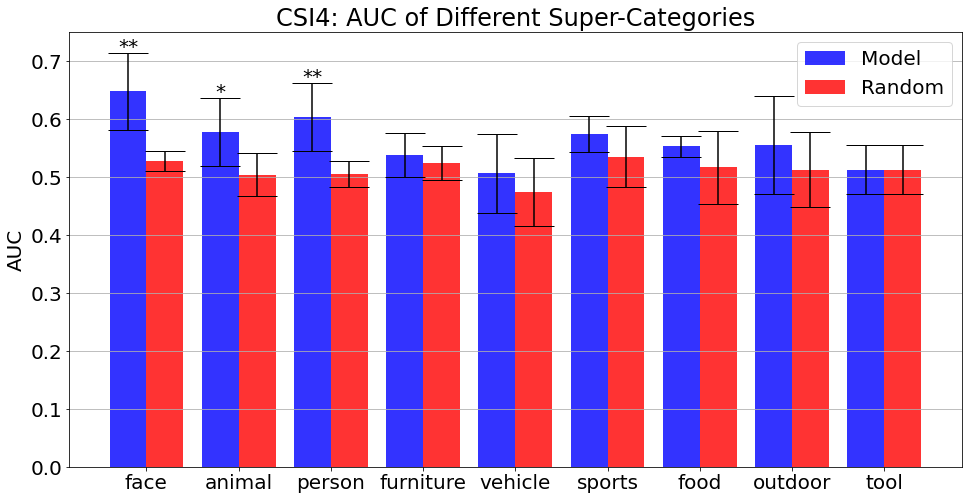

In [55]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories4 = categories
categories4_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI4: AUC of Different Super-Categories', leg_loc='upper right')

In [56]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
cat1 = np.mean(np.array(categories1), axis=1)
cat2 = np.mean(np.array(categories2), axis=1)
cat3 = np.mean(np.array(categories3), axis=1)
cat4 = np.mean(np.array(categories4), axis=1)
categories = np.array([cat1, cat2, cat3, cat4])
cat1_rand = np.mean(np.array(categories1_rand), axis=1)
cat2_rand = np.mean(np.array(categories2_rand), axis=1)
cat3_rand = np.mean(np.array(categories3_rand), axis=1)
cat4_rand = np.mean(np.array(categories4_rand), axis=1)
categories_rand = np.array([cat1_rand, cat2_rand, cat3_rand, cat4_rand])
print('Model:\n', np.round(np.transpose(categories),2))
print('Random:\n',np.round(np.transpose(categories_rand),2))

def sample(data):
    sample = [random.choice(data) for _ in range(len(data))]
    return sample

def bootstrap_t_test(treatment, control, nboot = 1000, direction = "greater"):
    ones = np.vstack((np.ones(len(treatment)),treatment))
    treatment = ones.conj().transpose()
    zeros = np.vstack((np.zeros(len(control)), control))
    control = zeros.conj().transpose()
    Z = np.vstack((treatment, control))
    tstat = np.mean(treatment[:,1])-np.mean(control[:,1])
    tboot = np.zeros(nboot)
    for i in range(nboot):
        sboot = sample(Z)
        sboot = pd.DataFrame(np.array(sboot), columns=['treat', 'vals'])
        tboot[i] = np.mean(sboot['vals'][sboot['treat'] == 1]) - np.mean(sboot['vals'][sboot['treat'] == 0]) - tstat
    if direction == "greater":
        pvalue = np.sum(tboot>=tstat-0)/nboot
    elif direction == "less":
        pvalue = np.sum(tboot<=tstat-0)/nboot
    else:
        print('Enter a valid arg for direction')

    return pvalue

Model:
 [[0.8  0.75 0.78 0.65]
 [0.76 0.63 0.68 0.58]
 [0.75 0.68 0.74 0.6 ]
 [0.63 0.57 0.55 0.54]
 [0.66 0.59 0.61 0.51]
 [0.73 0.64 0.68 0.57]
 [0.68 0.59 0.63 0.55]
 [0.55 0.53 0.58 0.56]
 [0.58 0.53 0.53 0.51]]
Random:
 [[0.5  0.51 0.5  0.53]
 [0.52 0.53 0.5  0.5 ]
 [0.49 0.5  0.49 0.5 ]
 [0.5  0.53 0.51 0.52]
 [0.5  0.51 0.49 0.47]
 [0.5  0.51 0.48 0.53]
 [0.48 0.49 0.5  0.52]
 [0.46 0.5  0.46 0.51]
 [0.5  0.51 0.51 0.51]]


face :
statistic: 16.0 p-value: 0.014285714285714285
animal :
statistic: 16.0 p-value: 0.014285714285714285
person :
statistic: 16.0 p-value: 0.014285714285714285
furniture :
statistic: 16.0 p-value: 0.014285714285714285
vehicle :
statistic: 15.0 p-value: 0.02857142857142857
sports :
statistic: 16.0 p-value: 0.014285714285714285
food :
statistic: 16.0 p-value: 0.014285714285714285
outdoor :
statistic: 16.0 p-value: 0.014285714285714285
tool :
statistic: 15.5 p-value: 0.021033206103390413


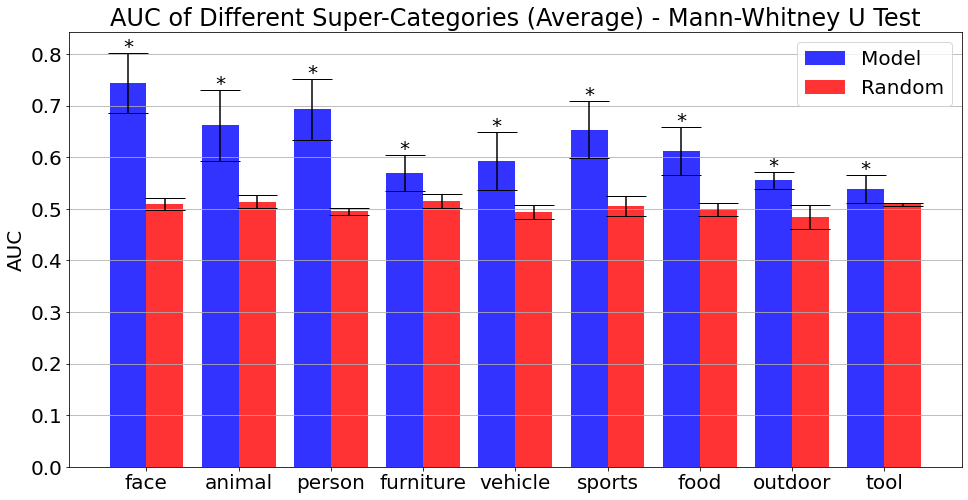

In [57]:
# Mann-Whitney U Test
CTEs, CTEs_rand, error, error_rand, x_pos = process(np.transpose(categories), np.transpose(categories_rand), names)
pvals = []
for r, u, v in zip(names, np.transpose(categories), np.transpose(categories_rand)):
    print(r,':')
    stat, pval = mannwhitneyu(u, v, alternative='greater')
    print('statistic:', stat, 'p-value:', pval)
    pvals.append(pval)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals,
           'AUC of Different Super-Categories (Average) - Mann-Whitney U Test', leg_loc='upper right')

face :
statistic: 10.0 p-value: 0.0625
animal :
statistic: 10.0 p-value: 0.0625
person :
statistic: 10.0 p-value: 0.0625
furniture :
statistic: 10.0 p-value: 0.0625
vehicle :
statistic: 10.0 p-value: 0.0625
sports :
statistic: 10.0 p-value: 0.0625
food :
statistic: 10.0 p-value: 0.0625
outdoor :
statistic: 10.0 p-value: 0.0625
tool :
statistic: 6.0 p-value: 0.05440471502027284


C:\Users\mahkh\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\mahkh\anaconda3\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


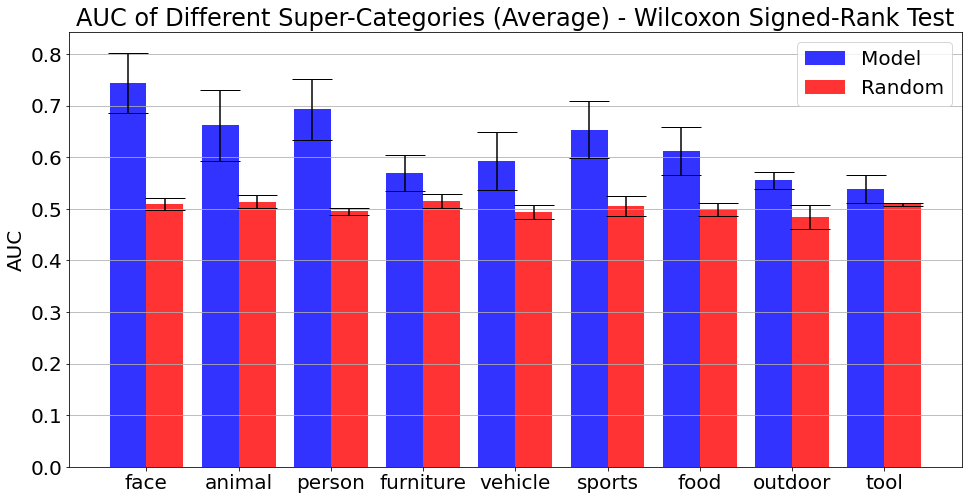

In [58]:
# Wilcoxon signed-rank test
CTEs, CTEs_rand, error, error_rand, x_pos = process(np.transpose(categories), np.transpose(categories_rand), names)
pvals = []
for r, u, v in zip(names, np.transpose(categories), np.transpose(categories_rand)):
    print(r,':')
    stat, pval = wilcoxon(u, v, alternative='greater')
    # stat, pval = kruskal(u, v)
    print('statistic:', stat, 'p-value:', pval)
    pvals.append(pval)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals,
           'AUC of Different Super-Categories (Average) - Wilcoxon Signed-Rank Test', leg_loc='upper right')

face :
statistic: 6.0 p-value: 0.0
animal :
statistic: 6.0 p-value: 0.0
person :
statistic: 6.0 p-value: 0.0
furniture :
statistic: 6.0 p-value: 0.013
vehicle :
statistic: 6.0 p-value: 0.0
sports :
statistic: 6.0 p-value: 0.0
food :
statistic: 6.0 p-value: 0.0
outdoor :
statistic: 6.0 p-value: 0.0
tool :
statistic: 6.0 p-value: 0.026


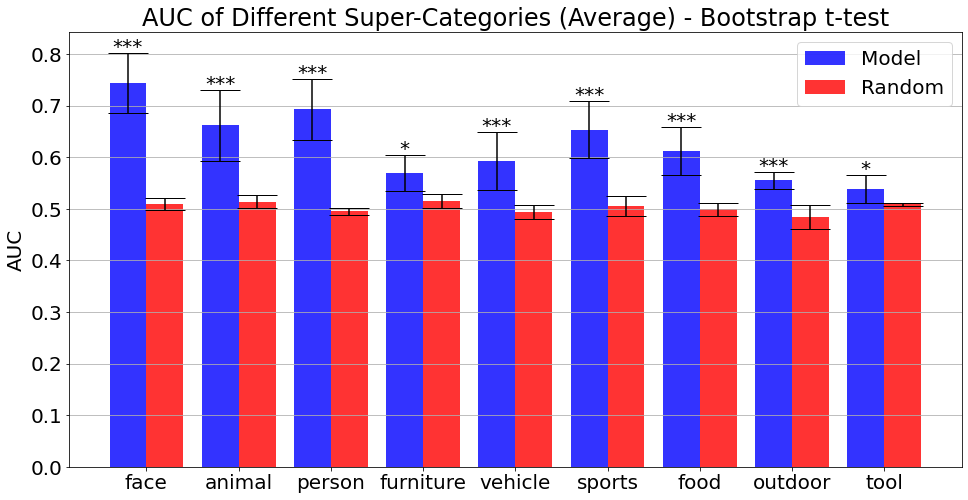

In [59]:
# Bootstrap t-test
CTEs, CTEs_rand, error, error_rand, x_pos = process(np.transpose(categories), np.transpose(categories_rand), names)
pvals = []
for r, u, v in zip(names, np.transpose(categories), np.transpose(categories_rand)):
    print(r,':')
    pval = bootstrap_t_test(u, v)
    print('statistic:', stat, 'p-value:', pval)
    pvals.append(pval)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals,
           'AUC of Different Super-Categories (Average) - Bootstrap t-test', leg_loc='upper right')
